<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_functions import quick_eda
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression

%matplotlib inline

#### 1.1 Load Data

In [3]:
# Read CSV
wine_csv = r"D:\Download\DataScience\Files\Week250923_MachineLearning\Module4\winequality_merged.csv"
winedf = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [18]:
# ANSWER
quick_eda(winedf)

--- Head ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1




--- Columns ---
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')


--- Shape ---
Number of Rows: 6497
Number of Columns: 13


--- Data Types ---
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object


--- Missing Values ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
p

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000




--- Correlations ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


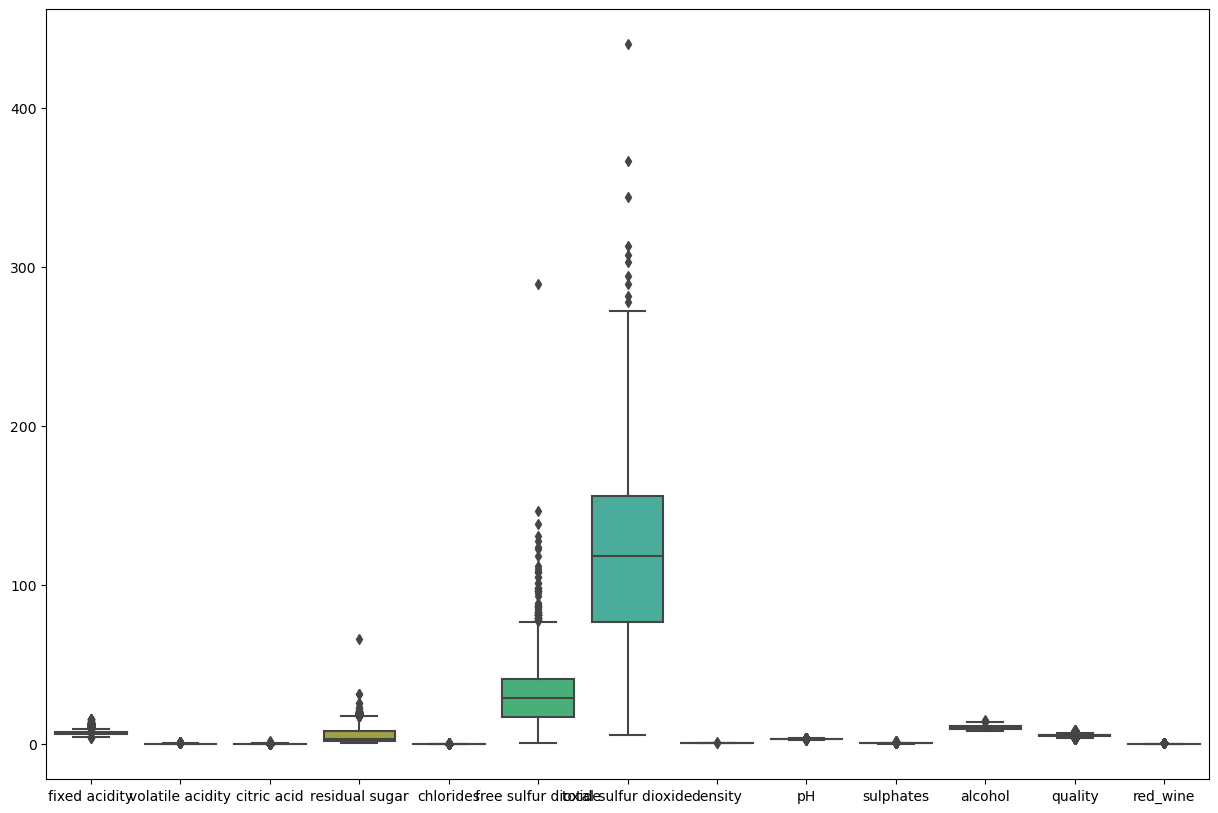

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=winedf)
plt.show()

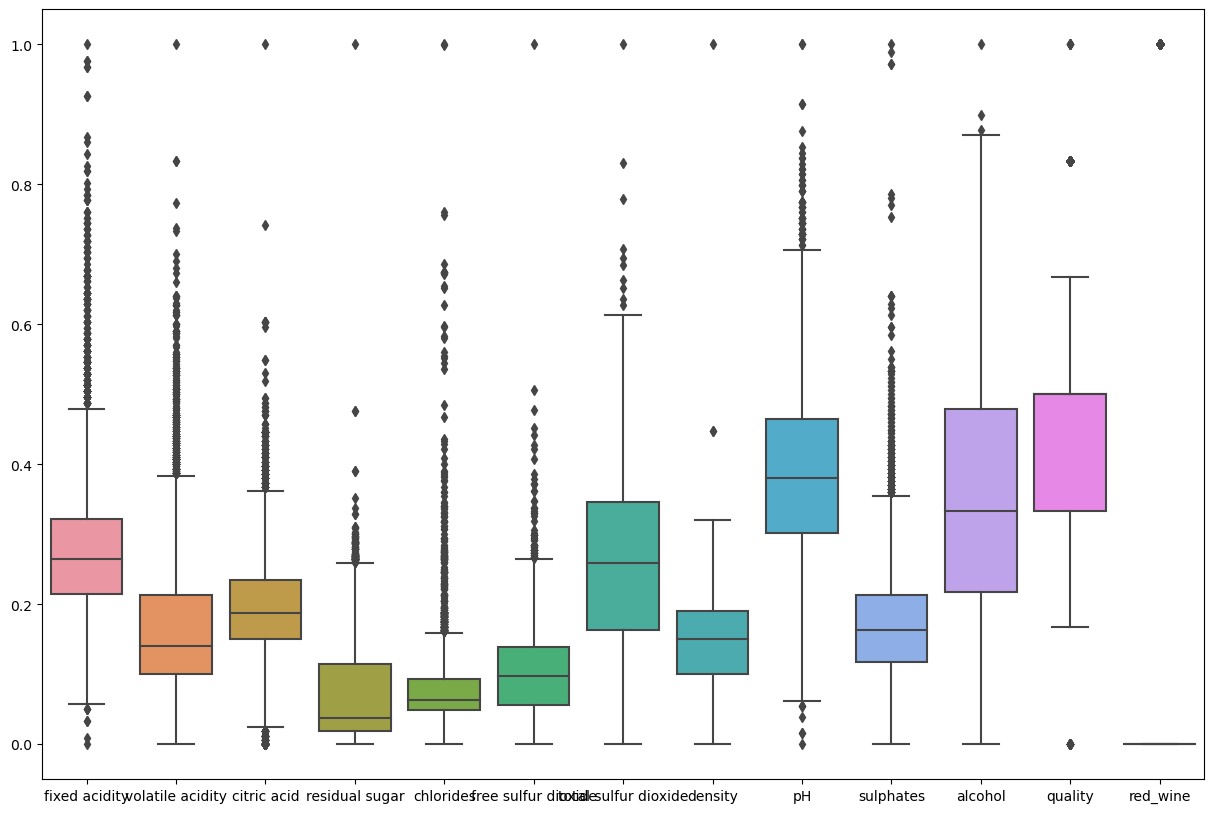

In [21]:
#isolating the numeric columns to then use a min/max scaler and visualising any outliers
numeric_cols = winedf.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

winedf_scaled = pd.DataFrame(scaler.fit_transform(winedf[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(15, 10))
sns.boxplot(data=winedf_scaled)
plt.show()

In [23]:
winedf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

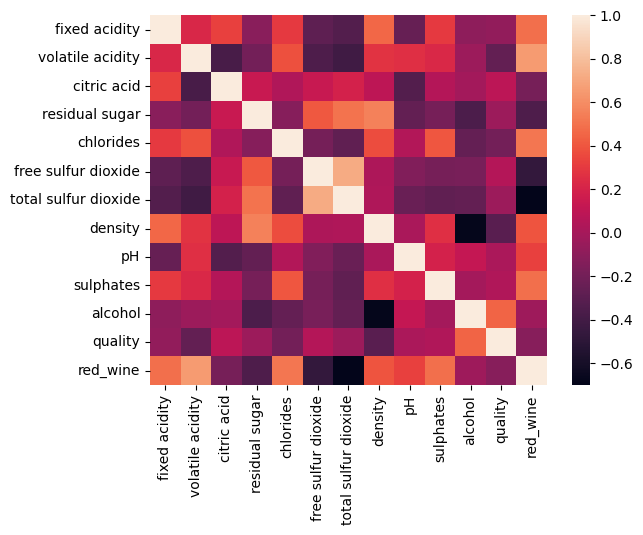

In [25]:
sns.heatmap(winedf.corr())

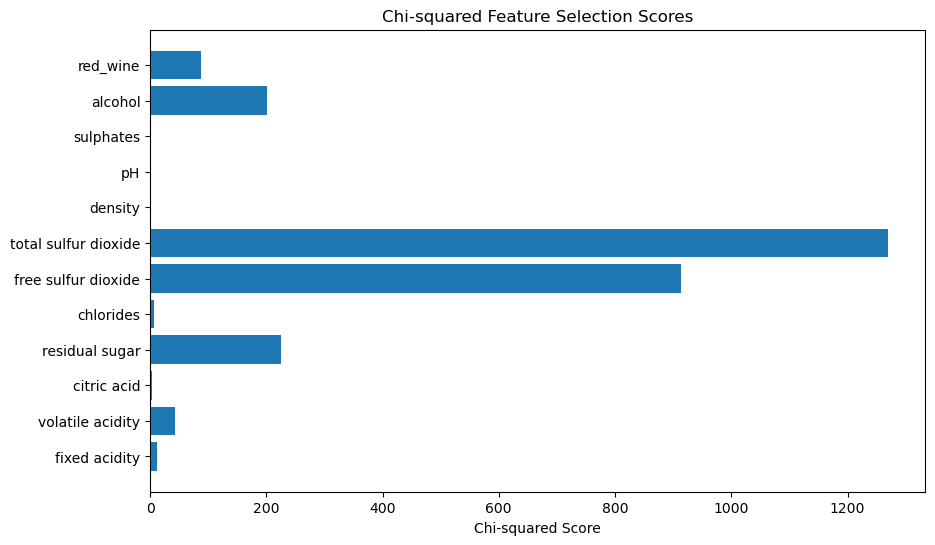

In [4]:
X = winedf.drop('quality', axis=1)
y = winedf['quality']

scores = SelectKBest(chi2, k=5).fit(X, y).scores_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), scores, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Chi-squared Score')
plt.title('Chi-squared Feature Selection Scores')
plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [5]:
# Target Variable
y = winedf['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

ANSWER:
Although it doesn't really show it on the heatmap, based on the chi square it would be:
- Total sulfur dioxide
- Free sulfur dioxide
- Residual sugar
- Alcohol
- Red wine
- Volatile acidity
- Fixed acidity

In [7]:
X = winedf[['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'alcohol', 'red_wine', 'volatile acidity', 'fixed acidity']]
X

,total sulfur dioxide,free sulfur dioxide,residual sugar,alcohol,red_wine,volatile acidity,fixed acidity
0,34.0,11.0,1.9,9.4,1,0.70,7.4
1,67.0,25.0,2.6,9.8,1,0.88,7.8
2,54.0,15.0,2.3,9.8,1,0.76,7.8
3,60.0,17.0,1.9,9.8,1,0.28,11.2
4,34.0,11.0,1.9,9.4,1,0.70,7.4
...,...,...,...,...,...,...,...
6492,92.0,24.0,1.6,11.2,0,0.21,6.2
6493,168.0,57.0,8.0,9.6,0,0.32,6.6
6494,111.0,30.0,1.2,9.4,0,0.24,6.5
6495,110.0,20.0,1.1,12.8,0,0.29,5.5


### 4. Using Linear Regression Create a Model and Test Score

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
# Create a model for Linear Regression
model = LinearRegression()

# Fit the model with the Training data
model.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
R2_Training = model.score(X_train, y_train)
print(f'R2 score for training data is {R2_Training}')

# Calculate the score (R^2 for Regression) for Testing Data
R2_Testing = model.score(X_test, y_test)
print(f'R2 score for testing data is {R2_Testing}')

R2 score for training data is 0.28824192328624
R2 score for testing data is 0.25950108660431226


## Cross validation

In [16]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [34]:
print(X.shape)
print(y.shape)

(6497, 7)
(6497,)


In [52]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    # Get training and test sets for X and y
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    # Fit model with training set
    model.fit(X_train, y_train)
    # Make predictions with training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Score R2 and RMSE on training and test sets and store in list
    trainscore = model.score(X_train, y_train)
    testscore = model.score(X_test, y_test)
    trainrmse = mean_squared_error(y_train, y_train_pred)
    testrmse = mean_squared_error(y_test, y_test_pred)
        
    train_scores.append(trainscore)
    train_rmse.append(trainrmse)
    test_scores.append(testscore)
    test_rmse.append(testrmse)

In [60]:
# Create a metrics_df dataframe to display r2 and rmse scores
score_list = [train_scores, train_rmse, test_scores, test_rmse]
column_list = ['train_scores', 'train_rmse', 'test_scores', 'test_rmse']

# pd.DataFrame(score_list, columns=column_list)
# I keep getting error here saying column number is mismatched, and just looking as how it is, it makes sense why
# The score_list contains 4 lists which itself has list of 5 scores from each fold. The shape is 4 x 5 instead of 5 x 4

metrics_df = pd.DataFrame(score_list)
print(f'at this point the shape of metrics_df is {metrics_df.shape}')

# Transpose it so it becomes correct shape
metrics_df = metrics_df.T

# Add the column name here
metrics_df.columns = column_list

at this point the shape of metrics_df is (4, 5)


In [61]:
metrics_df

,train_scores,train_rmse,test_scores,test_rmse
0,0.278890,0.549221,0.298157,0.537029
1,0.287351,0.542975,0.262794,0.561541
2,0.281630,0.550689,0.286478,0.531643
3,0.288517,0.545831,0.255627,0.551959
4,0.279788,0.543512,0.293818,0.560347


In [62]:
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.283235,0.546446,0.279375,0.548504
std,0.004421,0.003418,0.019044,0.013584
min,0.278890,0.542975,0.255627,0.531643
25%,0.279788,0.543512,0.262794,0.537029
50%,0.281630,0.545831,0.286478,0.551959
75%,0.287351,0.549221,0.293818,0.560347
max,0.288517,0.550689,0.298157,0.561541


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

The mean of the R2 score for all 5 folds are 0.279375. I've selected 7 features based on the chi square result. But putting all variables seems to give the best score at 0.298

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



